Important Remark: Before running the file, make sure you installed the COCO datset locally (see Readme.md in folder "data"). You need to change the path to the local COCO dataset in the cells below.

In [5]:
import numpy as np
import os
from tqdm import tqdm
from coco_helper_functions import *

In [6]:
# Change the working directory
import os
notebook_directory = os.path.dirname(os.path.abspath("__file__"))
os.chdir(notebook_directory)

In [7]:
#local file paths to COCO stuff dataset 
#TODO: CHANGE these paths
folder_path_fine = '/Users/TimUni/Desktop/my_new_Coco/annotations/val2017'
real_image_folder_path = '/Users/TimUni/Desktop/my_new_Coco/images/val2017'

#TODO: CHANGE these paths and create empty folders locally
folder_path_fine_512 = '/Users/TimUni/Desktop/my_new_Coco/annotations/val2017_512'
folder_path_coarse_512 = '/Users/TimUni/Desktop/my_new_Coco/annotations/val2017_512_coarse'

#TODO: specify how many files per COCO coarse category you want to select
num_of_images_per_class = 2


notebook_folder = os.getcwd()
superfolder_path = os.path.abspath(os.path.join(notebook_folder, '..'))  # Go up one level

#change these paths if you want to save images at different location
output_folder_path_coarse = os.path.join(superfolder_path, 'selected_coco_images/val2017_annotated_coarse')
output_folder_path_fine = os.path.join(superfolder_path, 'selected_coco_images/val2017_annotated_fine')
output_folder_path_original = os.path.join(superfolder_path, 'selected_coco_images/val2017_original')


#don't change these paths
coarse_file_path = os.path.join(superfolder_path, 'coco_utils/cocostuff_coarse_raw_ext.txt')
fine_file_path = os.path.join(superfolder_path, 'coco_utils/cocostuff_fine_raw.txt')
yaml_file_path = os.path.join(superfolder_path, 'coco_utils/cocostuff_hierarchy.y')

In [15]:
png_files = [file for file in os.listdir(folder_path_fine) if file.endswith('.png')]

#crop the annotated images to 512x512
for file_name in tqdm(png_files, desc="Processing files", unit="file"):
    store_png_image_as_512(folder_path_fine, folder_path_fine_512, file_name)

Processing files:   0%|          | 0/5000 [00:00<?, ?file/s]

Processing files: 100%|██████████| 5000/5000 [00:28<00:00, 175.82file/s]


In [8]:
#get fine mapping
# Load the mapping from the file
fine_mapping = load_mapping(fine_file_path)
# Example lookups
for number in range(0,len(fine_mapping)):
    description = lookup_description(number, fine_mapping)
    print(f"{number}: {description}")

0: person
1: bicycle
2: car
3: motorcycle
4: airplane
5: bus
6: train
7: truck
8: boat
9: traffic light
10: fire hydrant
11: street sign
12: stop sign
13: parking meter
14: bench
15: bird
16: cat
17: dog
18: horse
19: sheep
20: cow
21: elephant
22: bear
23: zebra
24: giraffe
25: hat
26: backpack
27: umbrella
28: shoe
29: eye glasses
30: handbag
31: tie
32: suitcase
33: frisbee
34: skis
35: snowboard
36: sports ball
37: kite
38: baseball bat
39: baseball glove
40: skateboard
41: surfboard
42: tennis racket
43: bottle
44: plate
45: wine glass
46: cup
47: fork
48: knife
49: spoon
50: bowl
51: banana
52: apple
53: sandwich
54: orange
55: broccoli
56: carrot
57: hot dog
58: pizza
59: donut
60: cake
61: chair
62: couch
63: potted plant
64: bed
65: mirror
66: dining table
67: window
68: desk
69: toilet
70: door
71: tv
72: laptop
73: mouse
74: remote
75: keyboard
76: cell phone
77: microwave
78: oven
79: toaster
80: sink
81: refrigerator
82: blender
83: book
84: clock
85: vase
86: scissors
87:

In [9]:
#get coarse mapping
coarse_mapping = load_mapping(coarse_file_path)
for number in range(0,len(coarse_mapping)):
    description = lookup_description(number, coarse_mapping)
    print(f"{number}: {description}")

0: appliance-things
1: electronic-things
2: food-things
3: furniture-things
4: indoor-things
5: kitchen-things
6: accessory-things
7: animal-things
8: outdoor-things
9: person-things
10: sports-things
11: vehicle-things
12: ceiling-stuff
13: floor-stuff
14: food-stuff
15: furniture-stuff
16: rawmaterial-stuff
17: textile-stuff
18: wall-stuff
19: window-stuff
20: building-stuff
21: ground-stuff
22: plant-stuff
23: sky-stuff
24: solid-stuff
25: structural-stuff
26: water-stuff


In [10]:
#get categories mapping
categories_mapping = load_categories_mapping(yaml_file_path)

# Example usage
item_category = 'fruit'
supercategory = get_supercategory(item_category, categories_mapping)
print(f'The supercategory of {item_category} is {supercategory}')
coarse_pixel_value = lookup_number(supercategory, coarse_mapping)
print(coarse_pixel_value)

The supercategory of fruit is food-stuff
14


In [19]:
#in first run, create the coarse files, otherwise skip this cell and execute the next one
#create dict with values 0 to 26 as keys and image names as values
import os
from tqdm import tqdm  # Import the tqdm library

coco_classes_in_images_dict = {}
for i in range(0,len(coarse_mapping)):
    coco_classes_in_images_dict[i] = []
# Specify the path to the folder containing the PNG files

png_files = [file for file in os.listdir(folder_path_fine_512) if file.endswith('.png')]

for file_name in tqdm(png_files, desc="Processing files", unit="file"):
    coco_classes_in_images_dict = convert_fine_to_coarse_segmentation(folder_path_fine_512, folder_path_coarse_512, file_name, coco_classes_in_images_dict, fine_mapping, coarse_mapping, categories_mapping)

print(coco_classes_in_images_dict)

Processing files: 100%|██████████| 5000/5000 [11:17<00:00,  7.38file/s]

{0: ['000000201775.png', '000000035326.png', '000000543047.png', '000000097022.png', '000000137294.png', '000000138819.png', '000000409358.png', '000000182611.png', '000000231339.png', '000000229358.png', '000000547816.png', '000000365387.png', '000000284623.png', '000000376310.png', '000000177935.png', '000000569917.png', '000000531771.png', '000000168593.png', '000000298396.png', '000000056127.png', '000000044279.png', '000000066231.png', '000000017379.png', '000000382696.png', '000000308430.png', '000000022705.png', '000000537672.png', '000000360564.png', '000000514914.png', '000000365385.png', '000000156278.png', '000000447169.png', '000000466986.png', '000000520910.png', '000000456662.png', '000000057238.png', '000000370818.png', '000000181859.png', '000000034760.png', '000000132329.png', '000000458663.png', '000000287714.png', '000000521405.png', '000000211825.png', '000000541291.png', '000000207538.png', '000000294350.png', '000000215114.png', '000000054654.png', '000000282296.p

In [11]:
#if you already have the coarse files, you can only execute this cell

coco_classes_in_images_dict = {}
for i in range(0,len(coarse_mapping)):
    coco_classes_in_images_dict[i] = []
print(coco_classes_in_images_dict)

png_files = [file for file in os.listdir(folder_path_coarse_512) if file.endswith('.png')]

for file_name in tqdm(png_files, desc="Processing files", unit="file"):
    coco_classes_in_images_dict = get_categories_in_image_and_add_to_dict(folder_path_coarse_512, file_name, coco_classes_in_images_dict)
print(coco_classes_in_images_dict)


{0: [], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8: [], 9: [], 10: [], 11: [], 12: [], 13: [], 14: [], 15: [], 16: [], 17: [], 18: [], 19: [], 20: [], 21: [], 22: [], 23: [], 24: [], 25: [], 26: []}


Processing files: 100%|██████████| 5000/5000 [01:37<00:00, 51.04file/s]

{0: ['000000201775.png', '000000035326.png', '000000543047.png', '000000097022.png', '000000137294.png', '000000138819.png', '000000409358.png', '000000182611.png', '000000231339.png', '000000229358.png', '000000547816.png', '000000365387.png', '000000284623.png', '000000376310.png', '000000177935.png', '000000569917.png', '000000531771.png', '000000168593.png', '000000298396.png', '000000056127.png', '000000044279.png', '000000066231.png', '000000017379.png', '000000382696.png', '000000308430.png', '000000022705.png', '000000537672.png', '000000360564.png', '000000514914.png', '000000365385.png', '000000156278.png', '000000447169.png', '000000466986.png', '000000520910.png', '000000456662.png', '000000057238.png', '000000370818.png', '000000181859.png', '000000034760.png', '000000132329.png', '000000458663.png', '000000287714.png', '000000521405.png', '000000211825.png', '000000541291.png', '000000207538.png', '000000294350.png', '000000215114.png', '000000054654.png', '000000282296.p

In [12]:
#get randomly selected images, num_of_images_per_class per class
import random
random.seed(2024)

list_of_selected_images = []

i=1
while i <= num_of_images_per_class:
    for key in coco_classes_in_images_dict:
        #get list of images for key
        list_of_images = coco_classes_in_images_dict.get(key)
        
        #select 1 random image from list which is not in list_of_selected_images
        random_image = random.choice(list_of_images)
        while random_image in list_of_selected_images:
            random_image = random.choice(list_of_images)

        #add random image to list_of_selected_images
        list_of_selected_images.append(random_image)
    i+=1

print(list_of_selected_images)
len(list_of_selected_images)

['000000485424.png', '000000139684.png', '000000044260.png', '000000276434.png', '000000167159.png', '000000002157.png', '000000443969.png', '000000165336.png', '000000490936.png', '000000478420.png', '000000270474.png', '000000039670.png', '000000009891.png', '000000082688.png', '000000034257.png', '000000498463.png', '000000025560.png', '000000386352.png', '000000214720.png', '000000034873.png', '000000163057.png', '000000327617.png', '000000074256.png', '000000106912.png', '000000414261.png', '000000534605.png', '000000027972.png', '000000344795.png', '000000050828.png', '000000348708.png', '000000435299.png', '000000150930.png', '000000398438.png', '000000517069.png', '000000194216.png', '000000104198.png', '000000459153.png', '000000559160.png', '000000508370.png', '000000532761.png', '000000367095.png', '000000167572.png', '000000505169.png', '000000067896.png', '000000173302.png', '000000353096.png', '000000127182.png', '000000217425.png', '000000491213.png', '000000276720.png',

54

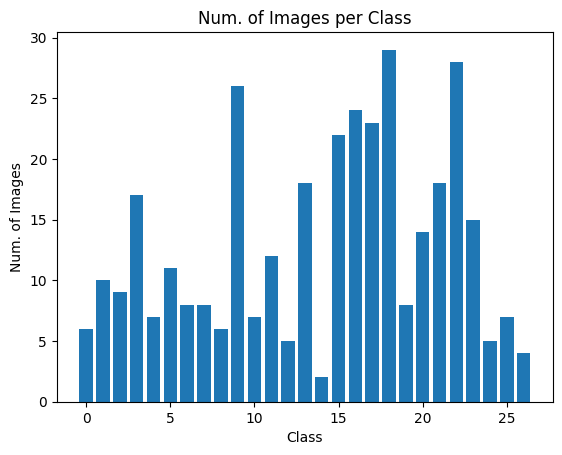

0 appliance-things: 6
1 electronic-things: 10
2 food-things: 9
3 furniture-things: 17
4 indoor-things: 7
5 kitchen-things: 11
6 accessory-things: 8
7 animal-things: 8
8 outdoor-things: 6
9 person-things: 26
10 sports-things: 7
11 vehicle-things: 12
12 ceiling-stuff: 5
13 floor-stuff: 18
14 food-stuff: 2
15 furniture-stuff: 22
16 rawmaterial-stuff: 24
17 textile-stuff: 23
18 wall-stuff: 29
19 window-stuff: 8
20 building-stuff: 14
21 ground-stuff: 18
22 plant-stuff: 28
23 sky-stuff: 15
24 solid-stuff: 5
25 structural-stuff: 7
26 water-stuff: 4


In [13]:
#plot num. of images per class after images are selected
import matplotlib.pyplot as plt

coco_classes_in_selected_images_dict = {}
for i in range(0,len(coarse_mapping)):
    coco_classes_in_selected_images_dict[i] = []
for file_name in (list_of_selected_images): 
    coco_classes_in_selected_images_dict = get_categories_in_image_and_add_to_dict(folder_path_coarse_512, file_name, coco_classes_in_selected_images_dict)


# Extract keys and corresponding list lengths
keys = list(coco_classes_in_selected_images_dict.keys())
values = [len(coco_classes_in_selected_images_dict[key]) for key in keys]

# Plotting
plt.bar(keys, values)
plt.xlabel('Class')
plt.ylabel('Num. of Images')
plt.title('Number of Images per Coarse Class in Test Set')
plt.show()

for i in range (0, len(coco_classes_in_images_dict)):
    label = lookup_description(keys[i], coarse_mapping)
    print(f"{keys[i]} {label}: {values[i]}")

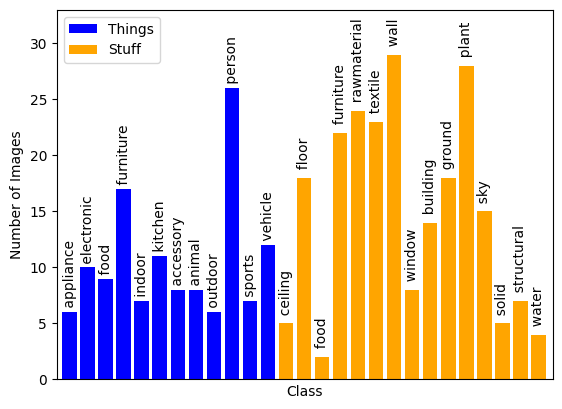

In [39]:
import matplotlib.pyplot as plt
import os

# Assuming you have already defined keys, values, and lookup_description function
# Also, assuming you have 'things' and 'stuff' indices to split the colors

# Splitting the bars into 'things' and 'stuff'
things_indices = range(12)  # Adjust the range based on your data
stuff_indices = range(12, len(keys))

# Plotting
fig, ax = plt.subplots()

# Plotting 'things' bars with one color
bars_things = plt.bar([keys[i] for i in things_indices], [values[i] for i in things_indices], color='blue')

# Plotting 'stuff' bars with another color
bars_stuff = plt.bar([keys[i] for i in stuff_indices], [values[i] for i in stuff_indices], color='orange')

plt.xlabel('Class')
plt.ylabel('Number of Images')
# plt.title('Number of Images per Coarse Class in Test Set')

# Adding labels vertically on the 'things' bars
for i, bar in zip(things_indices, bars_things):
    label = lookup_description(keys[i], coarse_mapping)
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f" {label}", ha='center', va='bottom', rotation=90)

# Adding labels vertically on the 'stuff' bars
for i, bar in zip(stuff_indices, bars_stuff):
    label = lookup_description(keys[i], coarse_mapping)
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f"  {label}", ha='center', va='bottom', rotation=90)

# Adding legend
plt.legend(['Things', 'Stuff'], loc='upper left')

# Set x-axis limits to remove empty space
plt.xlim(min(things_indices.start, stuff_indices.start) - 0.7, max(things_indices.stop, stuff_indices.stop) - 0.2)

# Manually set a higher y-axis limit to accommodate the text
plt.ylim(0, max(values) + 4)  # You can adjust the value as needed

# Hide x-axis ticks
plt.xticks([])

plt.show()


In [24]:
import shutil
#copy selected coarse files to new folder
# Iterate over the files in the folder
for file_name in tqdm(list_of_selected_images, desc="Processing files", unit="file"):
    #copy file to new folder
    shutil.copy(f"{folder_path_coarse_512}/{file_name}", f"{output_folder_path_coarse}/{file_name}")    

Processing files: 100%|██████████| 54/54 [00:00<00:00, 5322.22file/s]


In [25]:
#copy selected fine files to new folder
# Iterate over the files in the folder
for file_name in tqdm(list_of_selected_images, desc="Processing files", unit="file"):
    #copy file to new folder
    shutil.copy(f"{folder_path_fine_512}/{file_name}", f"{output_folder_path_fine}/{file_name}")  

Processing files: 100%|██████████| 54/54 [00:00<00:00, 1783.76file/s]


In [26]:
#get selected original images in 512 and copy to folder
jpg_files = [list_of_selected_images[i].replace('.png', '.jpg') for i in range(len(list_of_selected_images))]
# Iterate over the files in the folder
for file_name in tqdm(jpg_files, desc="Processing files", unit="file"):
    # Check if the file is a PNG file
    store_jpg_image_as_512(real_image_folder_path, output_folder_path_original, file_name)

Processing files: 100%|██████████| 54/54 [00:00<00:00, 121.08file/s]
